## **PyTorch Workflow**
### Explore an example PyTorch end-to-end workflow


In [1]:
things_to_cover = {
    1: 'data (prepare and load)',
    2: 'build a model or use pretrained one',
    3: 'fitting the model to data (training)',
    4: 'making predictions and evaluating the model (inference)',
    5: 'saving and loading the model',
    6: 'putting it all together'
}

things_to_cover

{1: 'data (prepare and load)',
 2: 'build a model or use pretrained one',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # Neural Networks also called Graphs
import matplotlib.pyplot as plt

torch.__version__

'2.4.1'

## 1. Data (Preparing and Loading)

- Excel Spreadsheet
- Images, Videos
- Audio, Text etc

Change data in numerical representation and build a model to learn the patterns in the data.

### 1.1. Create data using Linear Regression: **Y = a + bX**
- `Y` is dependent variable
- `a` is intercept 
- `b` is slope
- `X` is explanatory variable

**Parameter** - Something a model learns

In [3]:
# Create Known Parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) 
# unsqueeze(dim=1) - Each value will be in a separate square bracket 
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### 1.2. Splitting data into **training** and **test** sets

- *Course Material* - **Training Set**, Learns patterns
- *Practice Exam* - **Validation Set**, Tunes patterns based on errors
- *Final Exam* - **Test Set**, Tries to **Generalize** i.e Perform well on unseen data

In [4]:
# 80-20 Split
train_split = int(0.8 * len(X))
train_split

40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Can use Scikit Learn train test split
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### **1.3. Visualize** our Data

In [6]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
    """
    Plots training data, test data and compare predictions
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

    # Are there any predictions?
    if predictions is not None:
    # Plot predictions
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # Show Legends
    plt.legend(prop={'size':14});


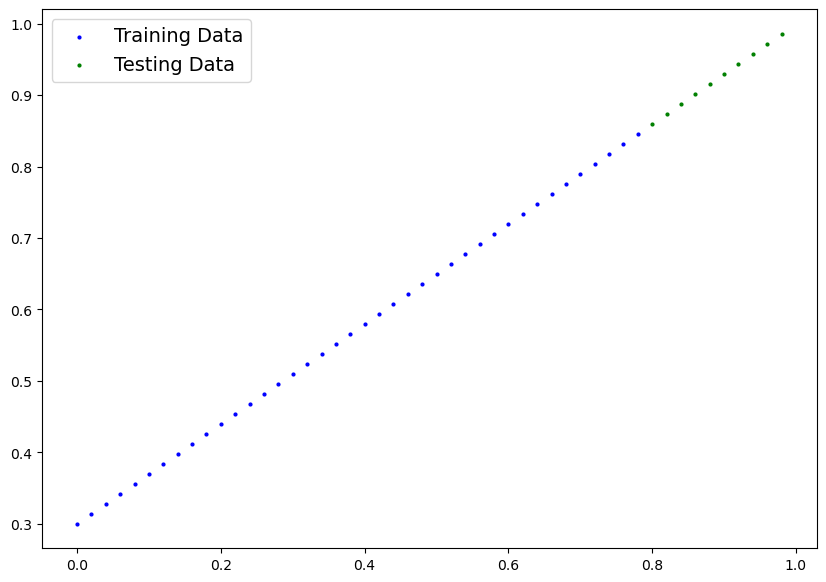

In [7]:
plot_predictions(); # New way to call functions, Ideal plot

### 2. Building a **Model** to fit the data above

**What our model does:**
- Start with random values (Weights and Bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data) 

**How does it do so?**

Through 2 main algorithms:
1. Gradient Descent
2. Backpropagation

In [8]:
# First PyTorch Model

# Create Linear Regression Model Class
class LinearRegression(nn.Module): # Inhertits from nn.Module, almost everything in PyTorch inherits from that class
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                    requires_grad=True, # <- Parameter is updated by Gradient Descent
                                    dtype=torch.float32))

        self.bias = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float32))

    # Forward Method to define the computation in the model
    '''
    `x: torch.Tensor` means `x` is expected to be of that type
    `-> torch.Tensor` denotes the return type
    '''
    def forward(self, x: torch.Tensor) -> torch.Tensor: # `x` is input data
        return self.weights * x + self.bias # Linear Regression Expression



### **Explaining the syntax of the code above**

1. `torch.randn()` vs `torch.rand()`
- Distribution is Normal/Gaussian `|` Distribution is Uniform
- Range [-♾️, +♾️] - but values cluster around 0 `|` Range [0, 1]
- Generates numbers centered around 0 with bell-shaped variability for initializing NN weights `|` Generates random numbers evenly spread in fixed range

2. `torch.randn(1, requires_grad=True, dtype=torch.float32)`
- `1` represents shape, Creates a tensor of shape `(1,)`

3. `forward()` is the computation performed at every call. Every Model Class requires a `forward()` function

### **2.1. PyTorch Model Building Essentials**
- **`torch.nn`** - Contains all the building blocks for computational graphs (a Neural Network)

- **`torch.nn.Parameter`** - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

- **`torch.nn.Module`** - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`

- **`torch.optim`** - This is where the optimizers in PyTorch are, they will help with Gradient Descent

- **`torch.utils.data.Dataset`**

- **`torch.utils.data.DataLoader`**

- **`torchvision.transforms`**

- **`torchvision.models`**

- **`torchmetrics`**

- **`torch.utils.tensorboard`**

**PyTorch Cheat Sheet from Official Documentation**

### Checking the content of the PyTorch Model

To check the model parameters or what's inside the model, we use `.parameters()`

In [9]:
torch.manual_seed(32)
torch.randn(1)

tensor([0.8651])

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create instance of the model - Subclass of nn.Module
model_zero = LinearRegression()

# Check the parameters
model_zero.parameters() # A generator object

# Convert to a List
list(model_zero.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_zero.state_dict() # Lists name and values in key-value pairs

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
print(f'Fixed Values: \nWeights: {weight}\nBias: {bias}')

Fixed Values: 
Weights: 0.7
Bias: 0.3


In [13]:
print(f'Initial Model Values: \nWeights: {list(model_zero.parameters())[0][0]}\nBias: {list(model_zero.parameters())[1][0]}')

Initial Model Values: 
Weights: 0.33669036626815796
Bias: 0.12880940735340118


🔼 **Goal is to update the model parameters to be similar in range to the original parameter values/fixed values**

- We start with random values when the model is initialized, then through optimization and computations, the parameters are tweaked

### Making predicitions using `torch.inference_mode()`

To check model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through the Model, it's going to run it through the `forward()` method

In [14]:
cnt_mngr = True
print(f'Actual Values: {y_test}')

if cnt_mngr:
    with torch.inference_mode(): 
    # ⬇️ Same thing as above, but `inference_mode()` is preferred
    # with torch.no_grad(): 
        '''
        Context Manager, disables Gradient Tracking 
        Doesn't keep track of a lot of numbers
        Mostly useful for making faster predictions on larger datasets
        '''        
        y_pred = model_zero(X_test)

    print(f'Model Predictions (Context Manager): {y_pred}')

else:
    y_pred = model_zero(X_test) # Shows `grad_fn`, applies Gradient Tracking
    print(f'Model Predictions (No Context Manager): {y_pred}')



Actual Values: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
Model Predictions (Context Manager): tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


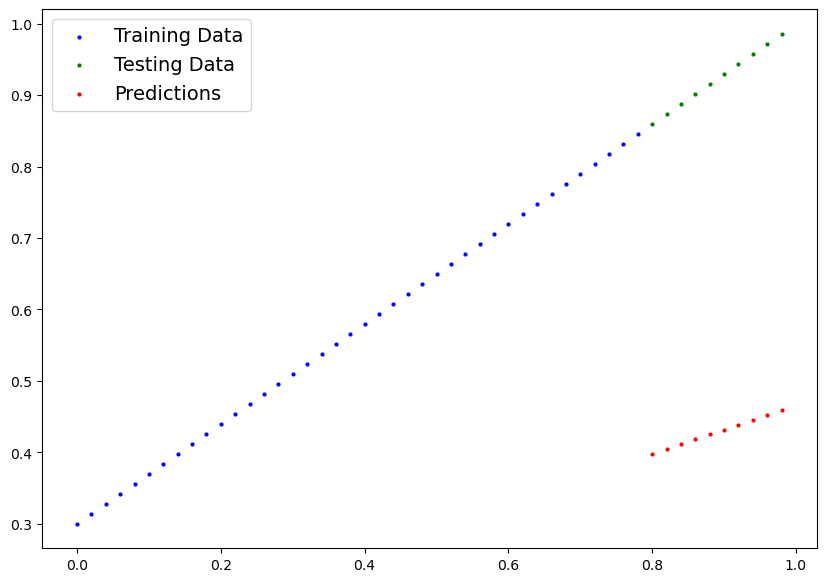

In [15]:
plot_predictions(predictions=y_pred) # Set `cnt_mngr` to True

### **3. Train Model**

The whole idea of training is for a model to move from a some *unknown* parameters (may be random) to some *known* parameters 

From a poor representation of the data to a better representation

One way to measure how poor or how wrong your model predicts is by using a **loss function / criterion / cost function**

**Prerequisites for Training:**
- **Loss Function**: Measure how wrong the model's predictions are from the ideal outputs, lower is better

- **Optimizer**: Takes into account the loss and adjusts the model parameters (weights, bias)

For PyTorch, we require:
- Training Loop 

- Testing Loop


In [16]:
model_zero.state_dict()
# 2 Parameters only

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **Loss Functions**

`nn.L1Loss` - Mean Absolute Error (MAE)
- Mean of absolute distance between predicted values and ideal values, refer to plot above

### **Optimizers**

`torch.optim`

**Algorithms**
1. `Adam`
2. `SGD` - Stochastic Gradient Descent (Randomly adjusts values)
    * If loss function increases when going in one direction, it shifts to other direction to minimize the loss


**For Regression Problems**:
- `nn.L1Loss()` & `torch.optim.SGD()`

**For Classification Problems:**
- `nn.BCELoss()` -> Binary Cross Entropy

In [17]:
# Setting a loss function
loss_fn = nn.L1Loss()

# Setting an optimizer
optimizer = torch.optim.SGD(params=model_zero.parameters(),
                            lr=0.01) 
''' 
lr - Learning Rate, Hyperparameter (Can be set by user) 
'''

'''
`lr` by how much the parameters are changed for every step of optimization
Larger `lr` means bigger changes per hit, same for smaller `lr`
'''

'\n`lr` by how much the parameters are changed for every step of optimization\nLarger `lr` means bigger changes per hit, same for smaller `lr`\n'

In [18]:
loss_fn(y_test, y_pred), model_zero.state_dict()

(tensor(0.4945),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

### **Building a training loop & testing loop in PyTorch**

*Requirements in a traing loop:*

0. Loop through the data

1. Forward Pass (This involves data moving through our `forward()` function, through the NN. Also called **Forward Propagation**)

2. Calculate the loss (Compare forward pass prediction to ground truth labels)

3. Optimizer Zero Grad

4. **Loss Backward** - Move Backwards through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**Backpropagation**)

5. Optimizer Step - Uses optimizer to adjust model parameter to try and decrease the loss (**Gradient Descent**)

#### **Learning Rate Scheduling**
- Smaller as we converge to a minimum point

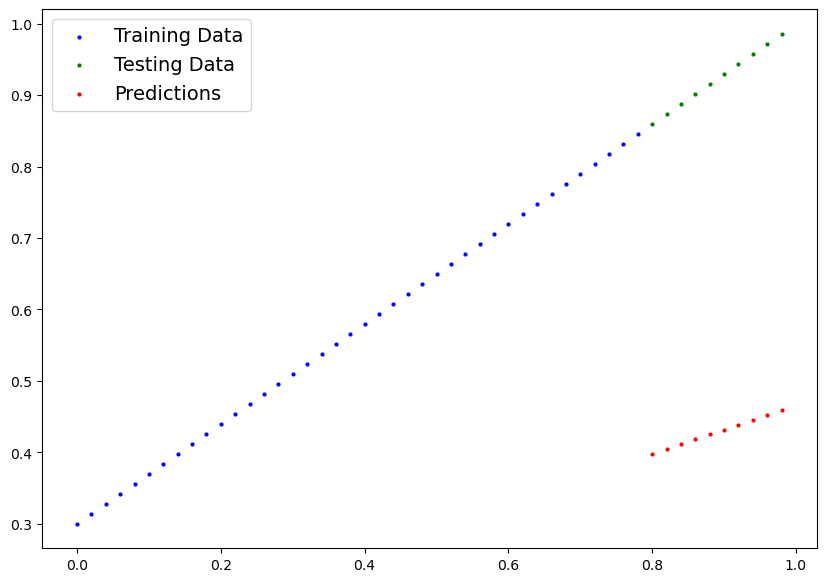

In [19]:
# Initial Plot
plot_predictions(predictions=y_pred)

In [20]:
# An epoch is 1 loop through the entire data
torch.manual_seed(42)

epochs = 201

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training model

    model_zero.train() 
    # Train mode in PyTorch sets all params that require grads to require grads

    # 1. Forward Pass
    y_pred = model_zero(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimize zero grad
    optimizer.zero_grad()

    '''
    `requires_grad=True`
    Gradients are derivatives, steepness of slope and opposite direction of 
    gradient is choosen for gradient descent, done by `torch.autograd` mechanism
    '''

    # 4. Perform backpropagation on the loss with respect to params of the model
    loss.backward()

    # 5. Step the Optimizer (Perform Gradient Descent)
    optimizer.step() 
    '''
    By default, how the optimizer changes will accumulate through the loop 
    So we have to zero above for next iteration, done for efficiency
    '''
    
    # Testing Mode
    model_zero.eval() # Turns off setting needed to test the model settings not needed for evaluation/testing

    with torch.inference_mode(): # Turns off grad tracking, faster performance

        # 1. Do the forward pass
        test_pred = model_zero(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if (epoch % 10 == 0):
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')


    # Print model state dict
    # print("Parameter Status: ", model_zero.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.05314852669

### Checking what happens at each step per epoch

In [21]:
# Check Parameters after some epochs
model_zero.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

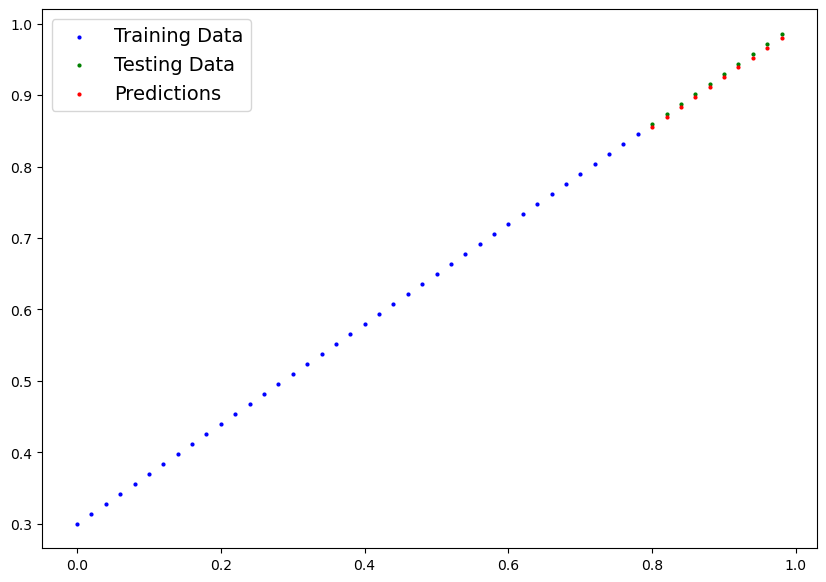

In [22]:
# Current Plot
with torch.inference_mode():
    y_pred_new = model_zero(X_test)
plot_predictions(predictions=y_pred_new)

In [23]:
# epoch_count, loss_values, test_loss_values

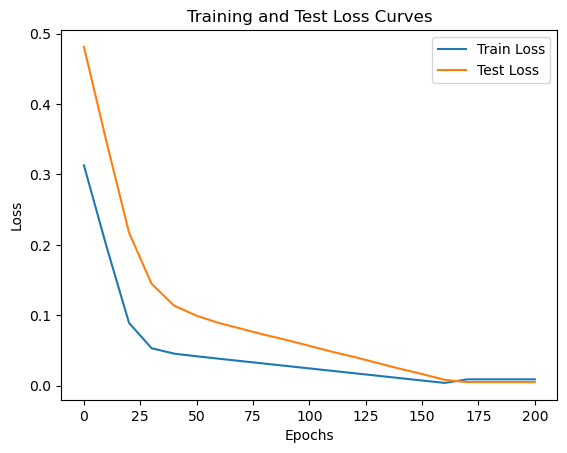

In [24]:
# Matplotlib works with Numpy hence it works with CPU
'''
We are storing the values into a list
So, we first convert into a Tensor then into a NumPy Array
`.cpu()` can be used to shift Tensor from GPU to CPU
'''

plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

### Saving the model in PyTorch

3 Main Methods to Save and Load Models in PyTorch

- `torch.save()`: Allows to save a PyTorch object in Python's Pickle format

- `torch.load()`: Allows to load a saved PyTorch object

- `torch.nn.Module.load_state_dict()`: This allows to load a model's saved state dictionary (Parameter Status) (Recommended)

In [25]:
from pathlib import Path
# 1. Create Model Directory
MODEL_PATH = Path('Models') # Directory Name
MODEL_PATH.mkdir(parents=True, exist_ok=True) 
# Create any missing parent directories, Example: Path(a/b/c)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_zero.pth' # .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_zero.state_dict(), 
           f=MODEL_SAVE_PATH)


Saving model to Models\01_pytorch_workflow_model_zero.pth


In [26]:
# Loading the Model - Create new instance of model class
model_zero_ld = LinearRegression()

# Load the saved `state_dict()`
model_zero_ld.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# ALL KEY MATCHED SUCCESSFULLY

print(f'Existing Model: {model_zero.state_dict()}')
print(f'Loaded Model: {model_zero_ld.state_dict()}') # Both same

Existing Model: OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
Loaded Model: OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})


C:\Users\prash\AppData\Local\Temp\ipykernel_28968\1695659923.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_zero_ld.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [27]:
# Make predictions using loaded model
model_zero_ld.eval()

with torch.inference_mode():
    loaded_pred = model_zero_ld(X_test)

loaded_pred

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [28]:
# Predictions for original model
model_zero.eval()

with torch.inference_mode():
    y_pred = model_zero(X_test)

y_pred

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [29]:
# Comparing loaded model preds with original model preds
y_pred == loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 👆 **Putting it all together**

Piece together everything in 1 place

### Data

**Importing Dependencies**


In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1'

**Device-agnostic code**

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device in use: {device}')

Device in use: cuda


Creating data using Linear Regression: **y = weight * X + bias**

In [32]:
weight = 0.6
bias = 0.2

# Create range of values
start = 0
end = 1
step = 0.020

# Create X and y features
X = torch.arange(start, end, step).unsqueeze(dim=1) # Adds a dim to reduce errors
y = weight * X + bias

X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [33]:
# Checking the data
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]))

In [34]:
# Split the data - Train and Test Split
train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(35, 35, 15, 15)

In [35]:
# Plot the data
def plot_predictions_new(train_data=X_train,
                         train_labels=y_train,
                         test_data=X_test,
                         test_labels=y_test,
                         predictions=None):
    plt.figure(figsize=(10, 7))

    # Plot the training data
    plt.scatter(train_data, train_labels, c='g', label='Training Data')

    # Plot the testing data
    plt.scatter(test_data, test_labels, c='b', label='Testing Data')

    # In case of Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')

    plt.legend(prop={'size':12});

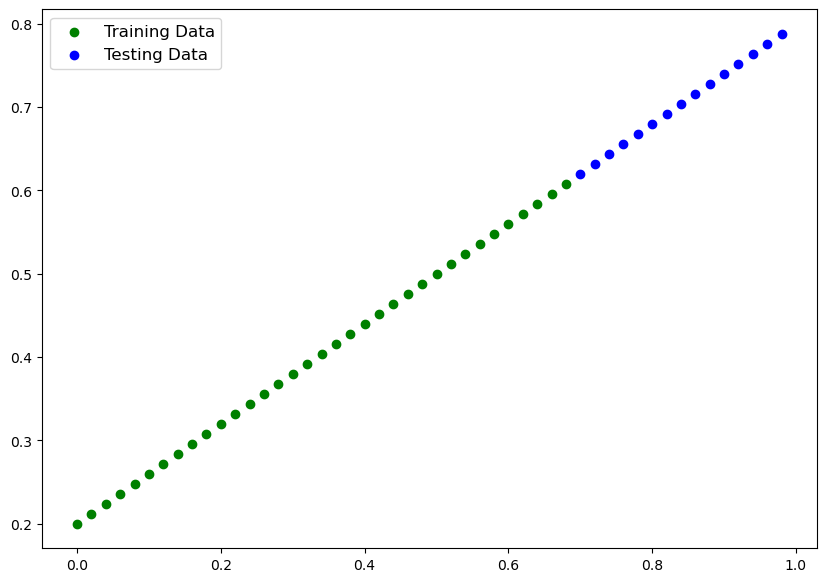

In [36]:
# Plotting initial data
plot_predictions_new();

Building a **Linear Regression Model Class**

`nn.Linear()` implements **Linear Regression** for us

In [37]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating Model Parameters - Layer Initialization
        # Also called Linear layer, Probing layer, Dense layer etc
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1) 
        # One in-feature to one out-feature

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x) # Pass the input through a linear layer
    
# Set the manual seed
torch.manual_seed(42)

model_one = LinearRegressionModel()
model_one, model_one.state_dict()
    

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [38]:
# Check current model device
next(model_one.parameters()).device # CPU

device(type='cpu')

In [39]:
# Shifting model to GPU
model_one.to(device)
next(model_one.parameters()).device # GPU

device(type='cuda', index=0)

**Training Code**

- Loss Function
- Optimizer 
- Training Loop
- Testing Loop

In [40]:
# Setup a loss function 
loss_fn_new = nn.L1Loss() # MAE

# Setup an optimizer
optimizer_new = torch.optim.SGD(params=model_one.parameters(),
                                lr=0.01)

In [41]:
# Construct a training loop
torch.manual_seed(42)

# Device agnostic code on the data
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 201
epoch_count = []
train_loss_vals = []
test_loss_vals = []

for epoch in range(epochs):

    model_one.train()

    # Forward Pass
    y_pred = model_one(X_train)

    # Loss Calculation
    train_loss = loss_fn_new(y_pred, y_train)

    # Optimizer Zero Grad
    optimizer_new.zero_grad()

    # Backward Pass
    train_loss.backward()

    # Step the optimizer, which way to optimize the params
    optimizer_new.step()

    # Testing
    model_one.eval() # Turn off settings like Drop Out, Norm layers

    with torch.inference_mode():
        test_pred = model_one(X_test)
    
        test_loss = loss_fn_new(test_pred, y_test)

    # Print out what's happening

    if epoch % 10 == 0:

        epoch_count.append(epoch)
        train_loss_vals.append(train_loss)
        test_loss_vals.append(test_loss)

        print(f'Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')

Epoch: 0 | Train Loss: 0.6859509944915771 | Test Loss: 0.7553642392158508
Epoch: 10 | Train Loss: 0.5743909478187561 | Test Loss: 0.6268041133880615
Epoch: 20 | Train Loss: 0.4628310203552246 | Test Loss: 0.4982439875602722
Epoch: 30 | Train Loss: 0.35127100348472595 | Test Loss: 0.3696838617324829
Epoch: 40 | Train Loss: 0.2397110015153885 | Test Loss: 0.24112369120121002
Epoch: 50 | Train Loss: 0.12815099954605103 | Test Loss: 0.11256355047225952
Epoch: 60 | Train Loss: 0.016590973362326622 | Test Loss: 0.015996627509593964
Epoch: 70 | Train Loss: 0.005357471760362387 | Test Loss: 0.014066236093640327
Epoch: 80 | Train Loss: 0.0026289012748748064 | Test Loss: 0.006772629916667938
Epoch: 90 | Train Loss: 0.0055193244479596615 | Test Loss: 0.010576991364359856
Epoch: 100 | Train Loss: 0.0055193244479596615 | Test Loss: 0.010576991364359856
Epoch: 110 | Train Loss: 0.0055193244479596615 | Test Loss: 0.010576991364359856
Epoch: 120 | Train Loss: 0.0055193244479596615 | Test Loss: 0.01057

In [42]:
model_one.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.5901]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.1977], device='cuda:0'))]),
 0.6,
 0.2)

In [43]:
# Evaluating 
model_one.eval()
with torch.inference_mode():
    y_pred = model_one(X_test)
    print(y_pred)
    print(y_test)

tensor([[0.6108],
        [0.6226],
        [0.6344],
        [0.6462],
        [0.6580],
        [0.6698],
        [0.6816],
        [0.6934],
        [0.7052],
        [0.7170],
        [0.7288],
        [0.7406],
        [0.7524],
        [0.7642],
        [0.7760]], device='cuda:0')
tensor([[0.6200],
        [0.6320],
        [0.6440],
        [0.6560],
        [0.6680],
        [0.6800],
        [0.6920],
        [0.7040],
        [0.7160],
        [0.7280],
        [0.7400],
        [0.7520],
        [0.7640],
        [0.7760],
        [0.7880]], device='cuda:0')


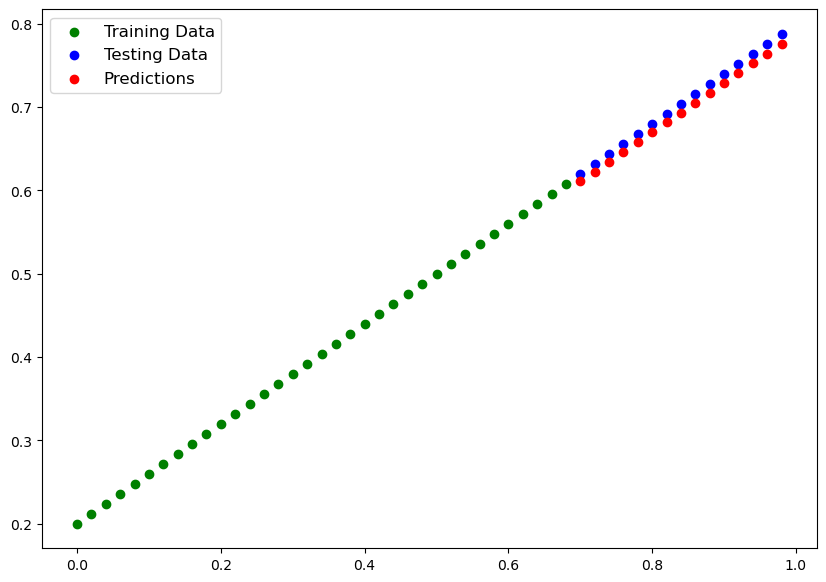

In [44]:
# Plotting Predictions
plot_predictions_new(predictions=y_pred.cpu()) 
# Shift to CPU since matplotlib works on CPU

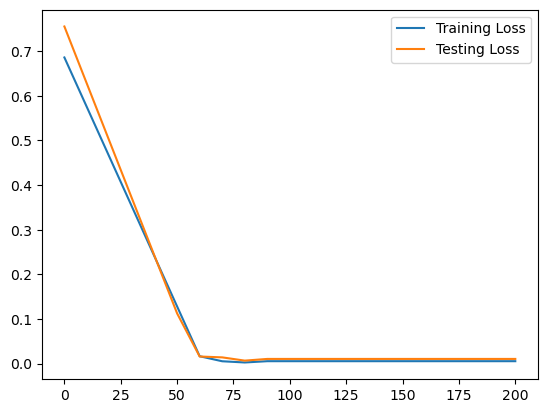

In [45]:
# Plotting Loss Curve
plt.plot(epoch_count, torch.tensor(train_loss_vals).numpy(), label='Training Loss')

plt.plot(epoch_count, torch.tensor(test_loss_vals).numpy(), label='Testing Loss')

plt.legend()

In [46]:
# Saving the new Model
from pathlib import Path
modelpath = Path('Models')
modelpath.mkdir(parents=True, exist_ok=True)

modelname = '01_pytorch_workflow_model_one.pth'

modelsavepath = modelpath / modelname

torch.save(obj=model_one.state_dict(),
           f=modelsavepath)

print(f'{modelname} successfully saved to {modelsavepath}')

01_pytorch_workflow_model_one.pth successfully saved to Models\01_pytorch_workflow_model_one.pth


In [47]:
# Loading the new Model

# Create new model sub-class
model_one_ld = LinearRegressionModel()

# Load the model state dict
model_one_ld.load_state_dict(torch.load(f=modelsavepath))

# Put the loaded model to device
model_one_ld.to(device)

next(model_one_ld.parameters()).device

C:\Users\prash\AppData\Local\Temp\ipykernel_28968\4038236444.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_one_ld.load_state_dict(torch.load(f=modelsavepath))


device(type='cuda', index=0)

In [48]:
model_one.state_dict(), model_one_ld.state_dict() # Same

(OrderedDict([('linear_layer.weight', tensor([[0.5901]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.1977], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[0.5901]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.1977], device='cuda:0'))]))

In [50]:
# Evaluate the loaded model
model_one_ld.eval()

with torch.inference_mode():
    y_pred_ld = model_one_ld(X_test)

y_pred_ld == y_pred # Same thing, Same device

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')